In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

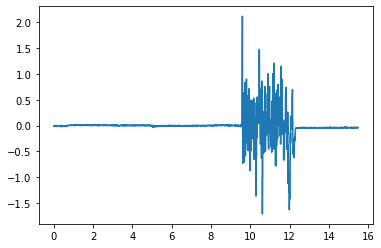

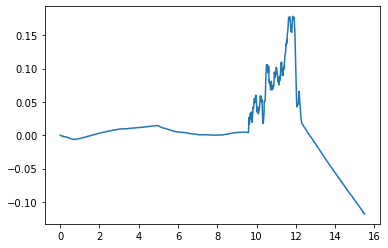

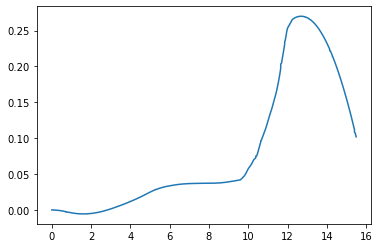

In [2]:
my_data = np.genfromtxt('./accelGyroData.csv',delimiter=',')

t_interval_list = my_data[:,0]
ax_list_raw = my_data[:,1]

t_list = []
for index, t_interval in enumerate(t_interval_list):
    t_list.append(sum(t_interval_list[:index]))

# calibration
index = next(x for x, val in enumerate(t_list) if val>8) # use first 8 secs to calibrate
calibration_ax = sum(ax_list_raw[:index])/index
calibration_ax

ax_list = ax_list_raw - calibration_ax

v_list = [0]
for index in range(len(ax_list)):
    if index>0:
        v = t_interval_list[index]*ax_list[index]+v_list[index-1]
        v_list.append(v)
v_list = np.array(v_list)
x_list = [0]
for index in range(len(ax_list)):
    if index>0:
        x = (t_interval_list[index]**2)*ax_list[index]/2+v_list[index]*t_interval_list[index]+x_list[index-1]
        x_list.append(x)
x_list = np.array(x_list)

plt.plot(t_list, ax_list)
plt.show()

plt.plot(t_list, v_list)
plt.show()

plt.plot(t_list, x_list)
plt.show()

In [3]:
def absFFT(times,amplitude):
    fourierTransform = np.fft.fft(amplitude)/len(amplitude)
    fourierTransform = fourierTransform[range(int(len(amplitude)/2))]
    values=np.arange(int(len(amplitude)/2))/(max(times)-min(times))
    return values,abs(fourierTransform)

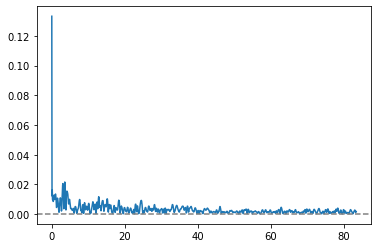

In [4]:
frequencies,powerSpectrum = absFFT(t_list,ax_list_raw)

plt.plot(frequencies,powerSpectrum)
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [5]:
frequencies,powerSpectrum

(array([0.00000000e+00, 6.45418543e-02, 1.29083709e-01, ...,
        8.31944502e+01, 8.32589921e+01, 8.33235339e+01]),
 array([0.13329059, 0.01223206, 0.0162106 , ..., 0.00107963, 0.00135623,
        0.00177246]))